In [1]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.layers import Dense
from matplotlib.colors import ListedColormap

import seaborn as sns


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn
     -------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00




[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
X,y= make_circles(n_samples=1000, noise=0.1, random_state=1)

<Axes: >

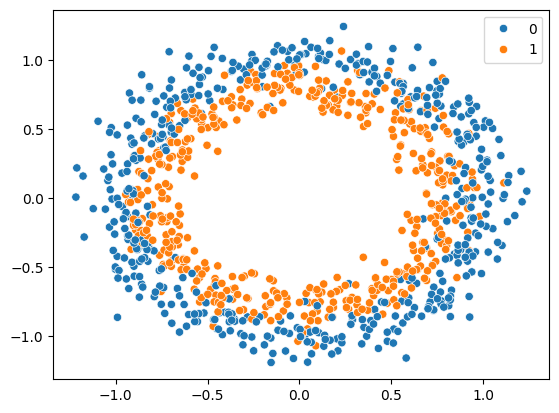

In [6]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [8]:
model=Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history=model.fit(X_train, y_train, epochs=3500,verbose=1,validation_data=(X_test, y_test))

Epoch 1/3500


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.3582 - val_accuracy: 0.8600 - val_loss: 0.3730
Epoch 2/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8682 - loss: 0.3328 - val_accuracy: 0.8650 - val_loss: 0.3718
Epoch 3/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8308 - loss: 0.3784 - val_accuracy: 0.8750 - val_loss: 0.3647
Epoch 4/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8463 - loss: 0.3636 - val_accuracy: 0.8600 - val_loss: 0.3710
Epoch 5/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8348 - loss: 0.3686 - val_accuracy: 0.8700 - val_loss: 0.3674
Epoch 6/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8523 - loss: 0.3326 - val_accuracy: 0.8700 - val_loss: 0.3690
Epoch 7/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8520 - loss: 0.3373 - val_accuracy: 0.8700 - val_loss: 0.3650
Epoch 8/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.3863 - val_accuracy: 0.8650 - val_lo

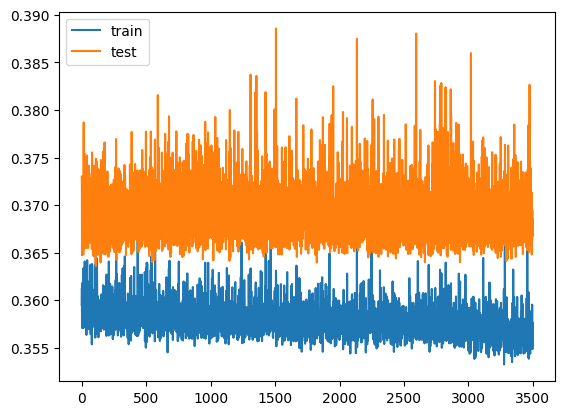

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
callback=EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=False,
    min_delta=0.00001,
    verbose=1,
    mode='auto',
    baseline=None,
    
)